<a href="https://colab.research.google.com/github/CAVASOL/aiffel_quest/blob/main/DL_quest/DL_prep/DL_Training_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How do we ‘train’ neural networks ?

### 4-1. 데이터 주도 학습

* 신경망의 특징은 데이터를 보고 학습할 수 있다는 것! 즉, 가중치 매개변수의 값인 데이터를 보고 자동으로 결정한다.
* 신경망에서 이미지의 특징은 보통 벡터로 기술하고, CV 분야에서는 SIFT, SURF, HOG 등으로 기술함.
* 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복.

### 4-2. Loss Function

* 손실 함수는 신경망 성능의 '나쁨'을 나타내는 하나의 지표.
* 신경망 학습의 목표는 손실 함수의 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것입니다.

**오차제곱값 Sum of squares for errors, SSE**

In [ ]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
import numpy as np

def sse(y, t):
    return 0.5 * np.sum((y-t)**2)

In [ ]:
sse(np.array(y), np.array(t))

0.09750000000000003

In [ ]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sse(np.array(y), np.array(t))

0.5975

**교차 엔트로피 오차 Cross Entropy Error, CEE**

In [ ]:
import numpy as np

def cee(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [ ]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cee(np.array(y), np.array(t))

0.510825457099338

In [ ]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cee(np.array(y), np.array(t))

2.302584092994546

**Minibatch**

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [ ]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [ ]:
np.random.choice(60000, 10)

array([31982, 36661,  3375, 45761, 20918, 16355, 36305, 26732, 34221,
       21340])

**CEE 구현하기**

In [ ]:
import numpy as np

def cee(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

        batch_size = y.shape[0]
        return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [ ]:
import numpy as np

def cee(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

        batch_size = y.shape[0]
        return -np.sum(t * np.log(y[np.arrange(batch_size), t] + 1e-7)) / batch_size

**수치 미분**

* 경사법에서는 기울기(경사값)를 기준으로 방향을 정함.

In [ ]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

In [ ]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

<function matplotlib.pyplot.show(close=None, block=None)>

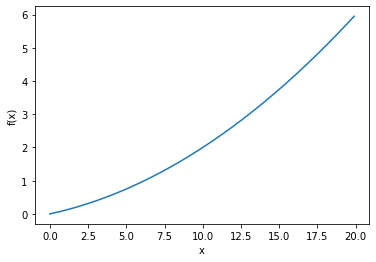

In [ ]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show

In [ ]:
numerical_diff(function_1, 5)

0.1999999999990898

In [ ]:
numerical_diff(function_1, 10)

0.2999999999986347

**편미분**

* 변수가 여럿인 함수에 대한 미분
* 특정 장소의 기울기

In [ ]:
def function_2(x):
    return x[0]**2 + x[1]**2 # np.sum(x**2)

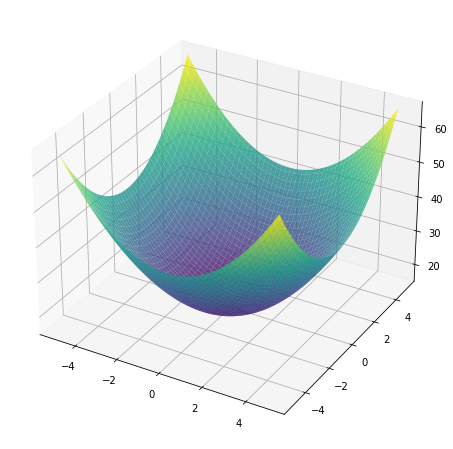

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x0 = np.linspace(-5, 5, 100)
x1 = np.linspace(-5, 5, 100)
x0, x1 = np.meshgrid(x0, x1)

def function_tmp1(x0, x1):
    return x0**2 + x1**2 + 4.0**2

z = function_tmp1(x0, x1)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x0, x1, z, cmap='viridis', alpha=0.8, label='function_tmp1')

plt.show()

### 4-4. 기울기

* 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향.

In [ ]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

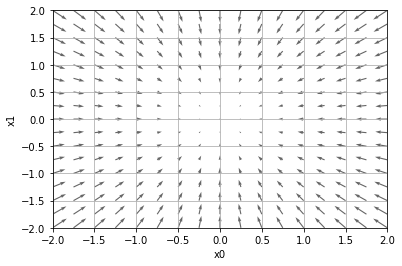

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)

    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]) )

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy", color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()

    plt.draw()
    plt.show()

**Gradient descent**

In [ ]:
pip install gradient

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

**simpleNet class**

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [ ]:
net = simpleNet()
print(net.W)

[[ 0.07147035 -0.52544673 -1.34227886]
 [ 0.89774497  0.79657532  1.67234731]]


In [ ]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[0.85085268 0.40164975 0.69974526]


In [ ]:
np.argmax(p)

0

In [ ]:
t = np.array([0, 0, 1])
net.loss(x, t)

1.0665542751130268

In [ ]:
def f(W):
    return net.loss(x, t)

In [ ]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.24020248  0.15328199 -0.39348446]
 [ 0.36030371  0.22992298 -0.5902267 ]]


In [ ]:
# f = lambda w: net.loss(x, t)
# dW = numerical_gradient(f, net.W)

### 4-5 학습 알고리즘 구현하기

**2층 신경망 클래스 구현하기**

In [ ]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [ ]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape

(784, 100)

In [ ]:
net.params['b1'].shape

(100,)

In [ ]:
net.params['W2'].shape

(100, 10)

In [ ]:
net.params['b2'].shape

(10,)

In [ ]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [ ]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

grads['W1'].shape

(784, 100)

In [ ]:
grads['b1'].shape

(100,)

In [ ]:
grads['W2'].shape

(100, 10)

In [ ]:
grads['b2'].shape

(10,)

**미니배치 학습 구현하기**

train acc, test acc | 0.09736666666666667, 0.0982
train acc, test acc | 0.7842666666666667, 0.7903
train acc, test acc | 0.8774, 0.8807
train acc, test acc | 0.8976166666666666, 0.9018
train acc, test acc | 0.90835, 0.9101
train acc, test acc | 0.9133666666666667, 0.9157
train acc, test acc | 0.9193833333333333, 0.9195
train acc, test acc | 0.9219666666666667, 0.9234
train acc, test acc | 0.9257666666666666, 0.9283
train acc, test acc | 0.9301833333333334, 0.9318
train acc, test acc | 0.9329666666666667, 0.934
train acc, test acc | 0.9354333333333333, 0.9365
train acc, test acc | 0.9378166666666666, 0.9392
train acc, test acc | 0.9405166666666667, 0.9402
train acc, test acc | 0.9419, 0.9422
train acc, test acc | 0.94505, 0.9442
train acc, test acc | 0.9463666666666667, 0.9457


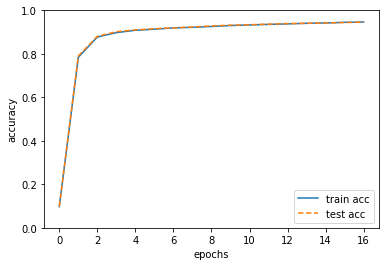

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()